In [38]:
from pylab import * #importing several functions from pylab, including numpy and pyplot

import numpy as np
import math
from math import pi
from numpy.lib import scimath as SM

def noise_algorithm(length,reals,site,dt,Wk,Gammak,Sk):
    #Constants over the whole procedure
    k = 8.6173303E-5 #boltzmann constant in eV/K
    T = 300 #Temperature in K
    hbar = 0.658211951 # in eV-fs
    N = (int(length/dt)+1)*site #+1 to account for the dt/dt that we need if  we want to have our time and Noise exactly finish at total_time
    
    #this contains the noise generation algorithm
    def spectral(w): #drude spectral density
        #converting the frequencies to angular frequencies. Update: done already on the definition as requested by professor        
        S = 0
        for i in range(len(Wk)):
            S += hbar*4*k*T*Sk[i]*Wk[i]**3*Gammak/((Wk[i]**2-w**2)**2+(w**2*Gammak**2))
        return S

    def generate_noise(mean, var,N,reals,site,dt):
        white_noise = np.random.normal(mean, var, size=(reals,N)) #generates matrix with white noise. Shape = reals x N. Here, mean = 0 and var = 1
        freq = np.fft.fft(white_noise)*1/sqrt(dt) #fourier transform of the white noise: W
        freq_bins = np.fft.fftfreq(N,dt)*2*pi #frequencies associated to fft(white noise)
        freq_enveloped = SM.sqrt(spectral(freq_bins)) * freq #sqrt(S)*W
        return np.real(np.fft.ifft(freq_enveloped))
    
    Noise = generate_noise(0, 1, N, reals,site,dt)
    return Noise

In [39]:
# parameters, but these are not being changed on the paper 
k = 8.6173303E-5 #boltzmann constant in eV/K
T = 300 #Temperature in K
hbar = 0.658211951 #including implicitly the 10^(-15) inside the frequencies. eV-fs
Gammak =  0.00062/hbar #9.4196*10**(-4) #rad/fs

#array with all the frequencies and S
Sk = array([0.011, 0.011, 0.009, 0.009, 0.010, 0.011, 0.011, 0.012, 0.003, 0.008,
         0.008, 0.003, 0.006,  0.002, 0.002, 0.002,  0.001, 0.002, 0.004,  0.007, 
         0.004, 0.004, 0.003,  0.006, 0.004, 0.003, 0.007, 0.010, 0.005, 0.004, 
         0.009, 0.018,  0.007, 0.006, 0.007, 0.003, 0.004, 0.001,  0.001,  0.002, 
         0.002,  0.003, 0.001, 0.002, 0.002, 0.001, 0.001, 0.003, 0.003, 0.009, 0.007,
         0.010, 0.003, 0.005, 0.002, 0.004, 0.007, 0.002, 0.004, 0.002, 0.003, 0.003])

Wk = array([46, 68, 117, 167, 180, 191, 202, 243, 263, 284, 291, 327, 366, 385, 404, 423, 440, 
         481, 541, 568, 582, 597, 630, 638, 665, 684, 713, 726, 731, 750, 761, 770, 795, 821,
         856, 891, 900, 924, 929, 946, 966, 984, 1004, 1037, 1058, 1094, 1104, 1123, 1130, 1162,
         1175, 1181, 1201, 1220, 1283, 1292, 1348, 1367, 1386, 1431, 1503, 1545])*1.23984*10**(-4)/hbar

#Parameters that could be changed
total_time = 1000 # lower frequencies require a higher length
dt = 1 #time step. Higher frequencies require a lower dt
reals = 100 #not really changed much
site = 4

In [40]:
OldNoise = noise_algorithm(total_time,reals,site,dt,Wk,Gammak,Sk)
N = int(total_time/dt)+1
t_axis = arange(0,dt*N,dt)

In [41]:
shape(OldNoise) #returns noise matrix of size (reals x N). N:= length/dt + 1
#plot(t_axis,OldNoise[5,:])
#show()

(100, 4004)

In [42]:
NewNoise = np.zeros((reals,int(total_time/dt)+1,site))
for j in range(4):
    print(j)
    NewNoise[:,:,j] = OldNoise[:,j*N:(j+1)*N]
    print(shape(NewNoise[:,:,j]))
#shape(NewNoise)
#It Works!!!

0
(100, 1001)
1
(100, 1001)
2
(100, 1001)
3
(100, 1001)


In [36]:
C = np.array(([1,2,3,4,5,6]))
C[0:5]

array([1, 2, 3, 4, 5])

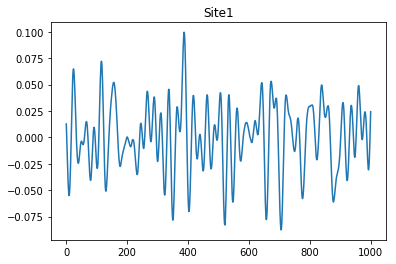

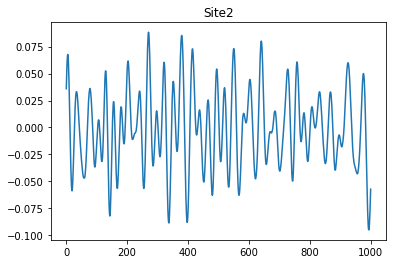

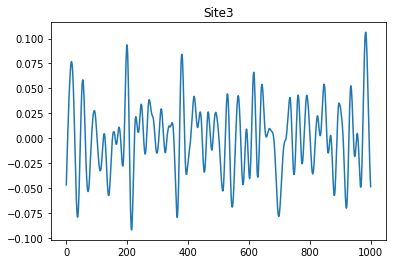

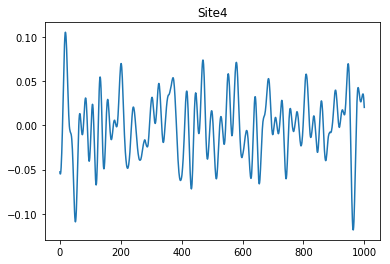

In [37]:
for i in range(4):
    title('Site' + str(i+1))
    plot(t_axis,NewNoise[0,:,i])
    show()

In [43]:
A = array(([1,2,3,'a'],[4,5,6,'b'],[7,8,9,'c']))
A

array([['1', '2', '3', 'a'],
       ['4', '5', '6', 'b'],
       ['7', '8', '9', 'c']], dtype='<U11')

In [30]:
mean(A,axis=0)

array([4., 5., 6.])

In [52]:
ndim(A)
A[0:2,:]

array([['1', '2', '3', 'a'],
       ['4', '5', '6', 'b']], dtype='<U11')

In [61]:
B = np.zeros((1,3,2))
B

array([[[0., 0.],
        [0., 0.],
        [0., 0.]]])

In [103]:
a= np.array(([10,20,30,40,50,60],[70,80,90,100,110,120],[130,140,150,160,170,180],[190,200,210,220,230,240]))
print(a)
print(shape(a))

[[ 10  20  30  40  50  60]
 [ 70  80  90 100 110 120]
 [130 140 150 160 170 180]
 [190 200 210 220 230 240]]
(4, 6)


In [107]:
b = a.reshape((3,4,2))
b

array([[[ 10,  20],
        [ 30,  40],
        [ 50,  60],
        [ 70,  80]],

       [[ 90, 100],
        [110, 120],
        [130, 140],
        [150, 160]],

       [[170, 180],
        [190, 200],
        [210, 220],
        [230, 240]]])

In [108]:
shape(b)

(3, 4, 2)

In [109]:
b[:,:,0]

array([[ 10,  30,  50,  70],
       [ 90, 110, 130, 150],
       [170, 190, 210, 230]])

In [94]:
N1 = array(([10,20],[70,80],[130,140],[190,200]))
N2 = array(([30,40],[90,100],[150,160],[210,220]))
N3 = array(([50,60],[110,120],[170,180],[230,240]))
N_all = array(([N1,N2,N3]))
N_all

array([[[ 10,  20],
        [ 70,  80],
        [130, 140],
        [190, 200]],

       [[ 30,  40],
        [ 90, 100],
        [150, 160],
        [210, 220]],

       [[ 50,  60],
        [110, 120],
        [170, 180],
        [230, 240]]])

In [95]:
shape(N_all)

(3, 4, 2)

In [102]:
N_all[0,:,:]

array([[ 10,  20],
       [ 70,  80],
       [130, 140],
       [190, 200]])

In [79]:
x = np.array([[[1],[2],[3]], [[4],[5],[6]]])
shape(x)

(2, 3, 1)

In [10]:
x_rand = np.random.normal(0, 1, size=(2,2,3))
x_rand

array([[[-0.77743216, -1.01102957,  0.3606916 ],
        [-0.60336812,  1.01037652,  2.2428558 ]],

       [[ 0.88232086, -0.24896917, -0.45401293],
        [ 0.71247895, -1.63612522, -0.85709131]]])

In [12]:
shape(x_rand[0,:,:])

(2, 3)

In [25]:
M1 = array(([1,2],[3,4],[5,6]))
M2 = array([7,8])
M2*M1

array([[ 7, 16],
       [21, 32],
       [35, 48]])

In [36]:
x = np.array([[[1],[2],[3]], [[4],[5],[6]]])
shape(x)

(2, 3, 1)

In [39]:
x[1,:,:]

array([[4],
       [5],
       [6]])

In [45]:
#Advise from Yannick: (April 1st)
#I should create an array of zeros with the right dimensions
# This seems to be working, so now I just need to create a noise matrix with more noise (or realizations) 
# and then loop over the different sites: newNoise[:,:,j] = oldNoise[:,j*total_length+(j+1*total_length)]
Holder = np.zeros((4,2,3))
Holder

array([[[0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.]]])

In [53]:
Holder[:,:,0] = np.arange(1,9).reshape(4,2)
Holder[:,:,1] = np.arange(9,17).reshape(4,2)
Holder[:,:,2] = np.arange(17,25).reshape(4,2)
Holder[:,:,2]

array([[17., 18.],
       [19., 20.],
       [21., 22.],
       [23., 24.]])

In [54]:
Holder

array([[[ 1.,  9., 17.],
        [ 2., 10., 18.]],

       [[ 3., 11., 19.],
        [ 4., 12., 20.]],

       [[ 5., 13., 21.],
        [ 6., 14., 22.]],

       [[ 7., 15., 23.],
        [ 8., 16., 24.]]])